# Step 1: Load Necessary libraries

In [555]:
#Import Necessary Libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score


import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

# Step 2:  Reading and Understanding the data.

In [556]:
#Load the data in the dataframe
data=pd.read_csv('day.csv')
data.shape

(730, 16)

In [557]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Step 3: Perform EDA on data.

In [558]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


- Inference
   - File has 730 rows and 16 columns 
   - There are no missing values in the data.

In [559]:
# Drop column instant, dateday,casual, regsistered.
#instant is just an index
#dteday is no longer relevant as there is a separate column showing month and year
#casual and registered count is already present in the cnt column and is not a feature of the model

columns_to_drop={'instant','dteday','casual','registered'}
data=data.drop(columns_to_drop,axis=1)
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [560]:
data.shape

(730, 12)

In [561]:
#Transform columns to meaningful values as per data dictionary

season_mapping= {1:'spring', 2:'summer', 3:'fall', 4:'winter'}
data['season']= data['season'].replace(season_mapping)

yr_mapping={0:2018, 1:2019}
data['yr']=data['yr'].replace(yr_mapping)

weathersit_mapping= {1: 'Clear',2: 'Mist',3:'Light Rain',4: 'Heavy Rain'}
data['weathersit']=data['weathersit'].replace(weathersit_mapping)

weekday_mapping={0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thur',5:'Fri',6:'Sat'}
data['weekday']=data['weekday'].replace(weekday_mapping)

month_mapping = {1: 'Jan',2: 'Feb',3: 'Mar',4: 'Apr',5: 'May',6: 'Jun',7: 'Jul',8: 'Aug',9: 'Sep',10: 'Oct',11: 'Nov',12: 'Dec'}
data['mnth']=data['mnth'].replace(month_mapping)

data.head(300)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
...,...,...,...,...,...,...,...,...,...,...,...,...
295,winter,2018,Oct,0,Sun,0,Clear,17.288347,21.11665,74.1250,6.667338,4381
296,winter,2018,Oct,0,Mon,1,Clear,18.996653,22.85335,77.2083,7.959064,4187
297,winter,2018,Oct,0,Tue,1,Clear,19.338347,23.16875,62.2917,11.166086,4687
298,winter,2018,Oct,0,Wed,1,Mist,19.850847,23.64230,72.0417,9.959014,3894


In [562]:
data.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2018.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,2018.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2018.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,2018.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,2019.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,2019.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


## Visualise the Numeric variables

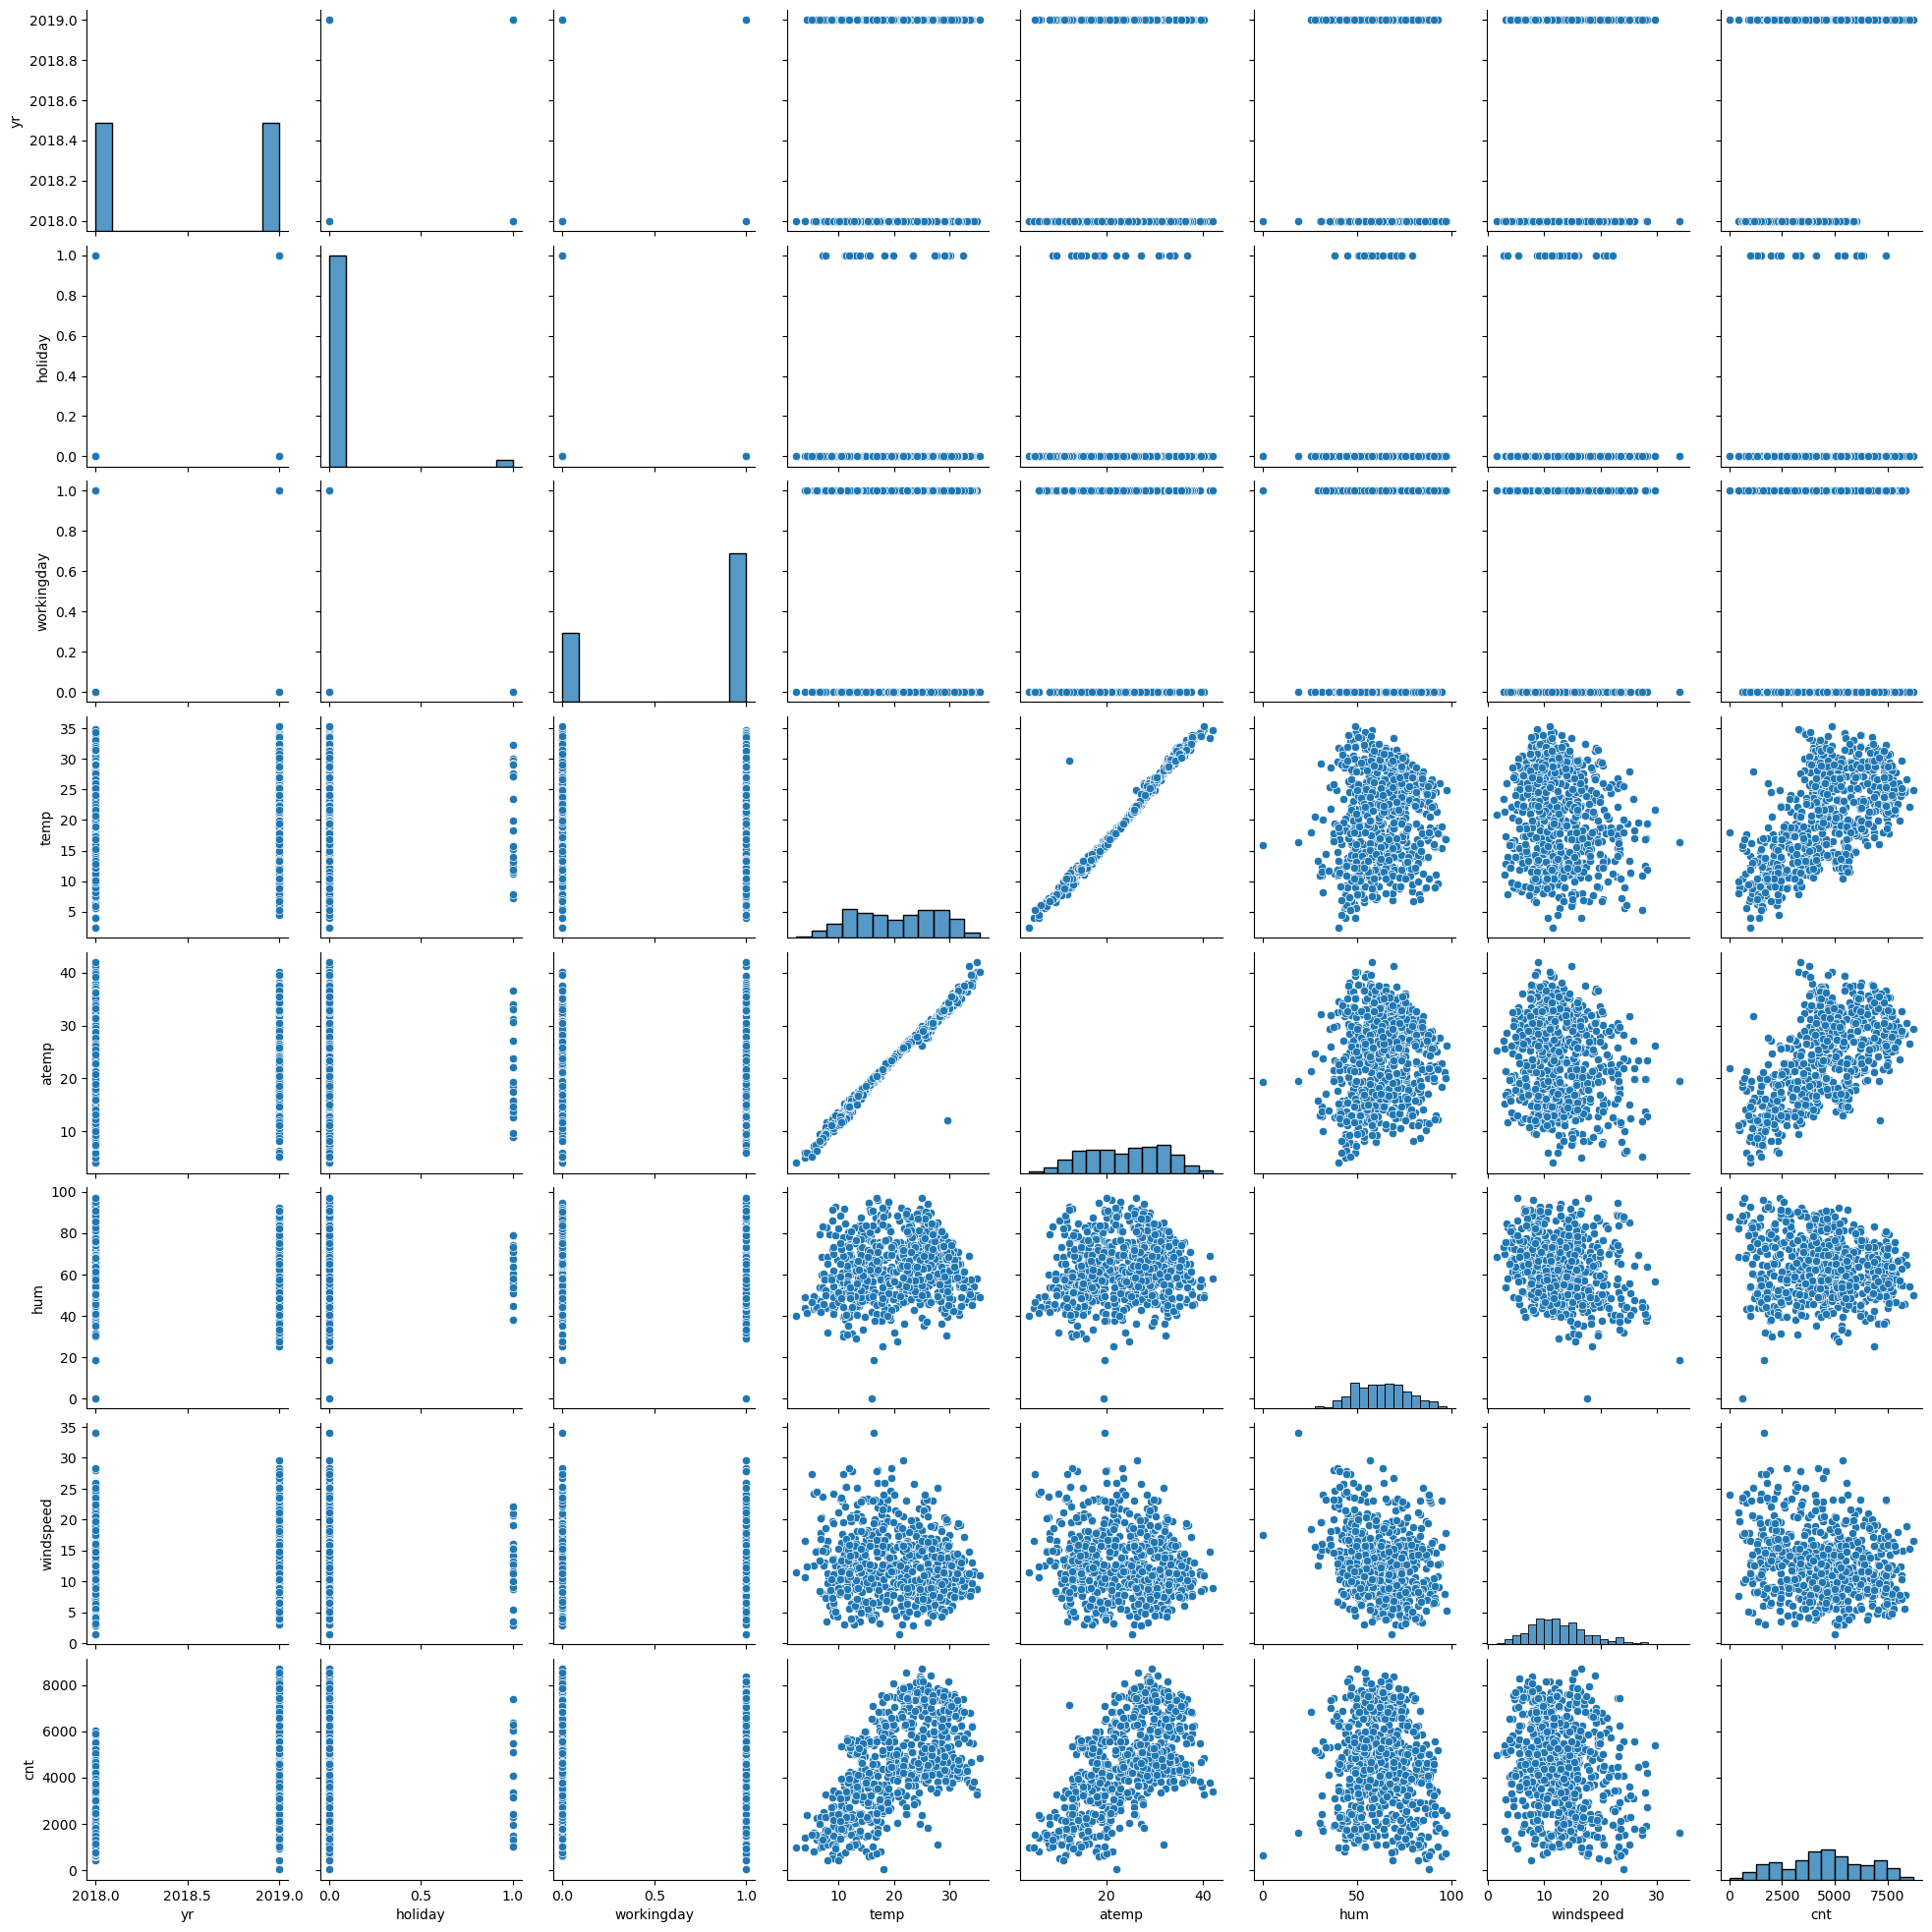

In [563]:
# Univariate Analysis, compairing the independent variables with respect to dependent variable cnt
sns.pairplot(data)
plt.show()

In [564]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


## Visualise the Categorical variables 

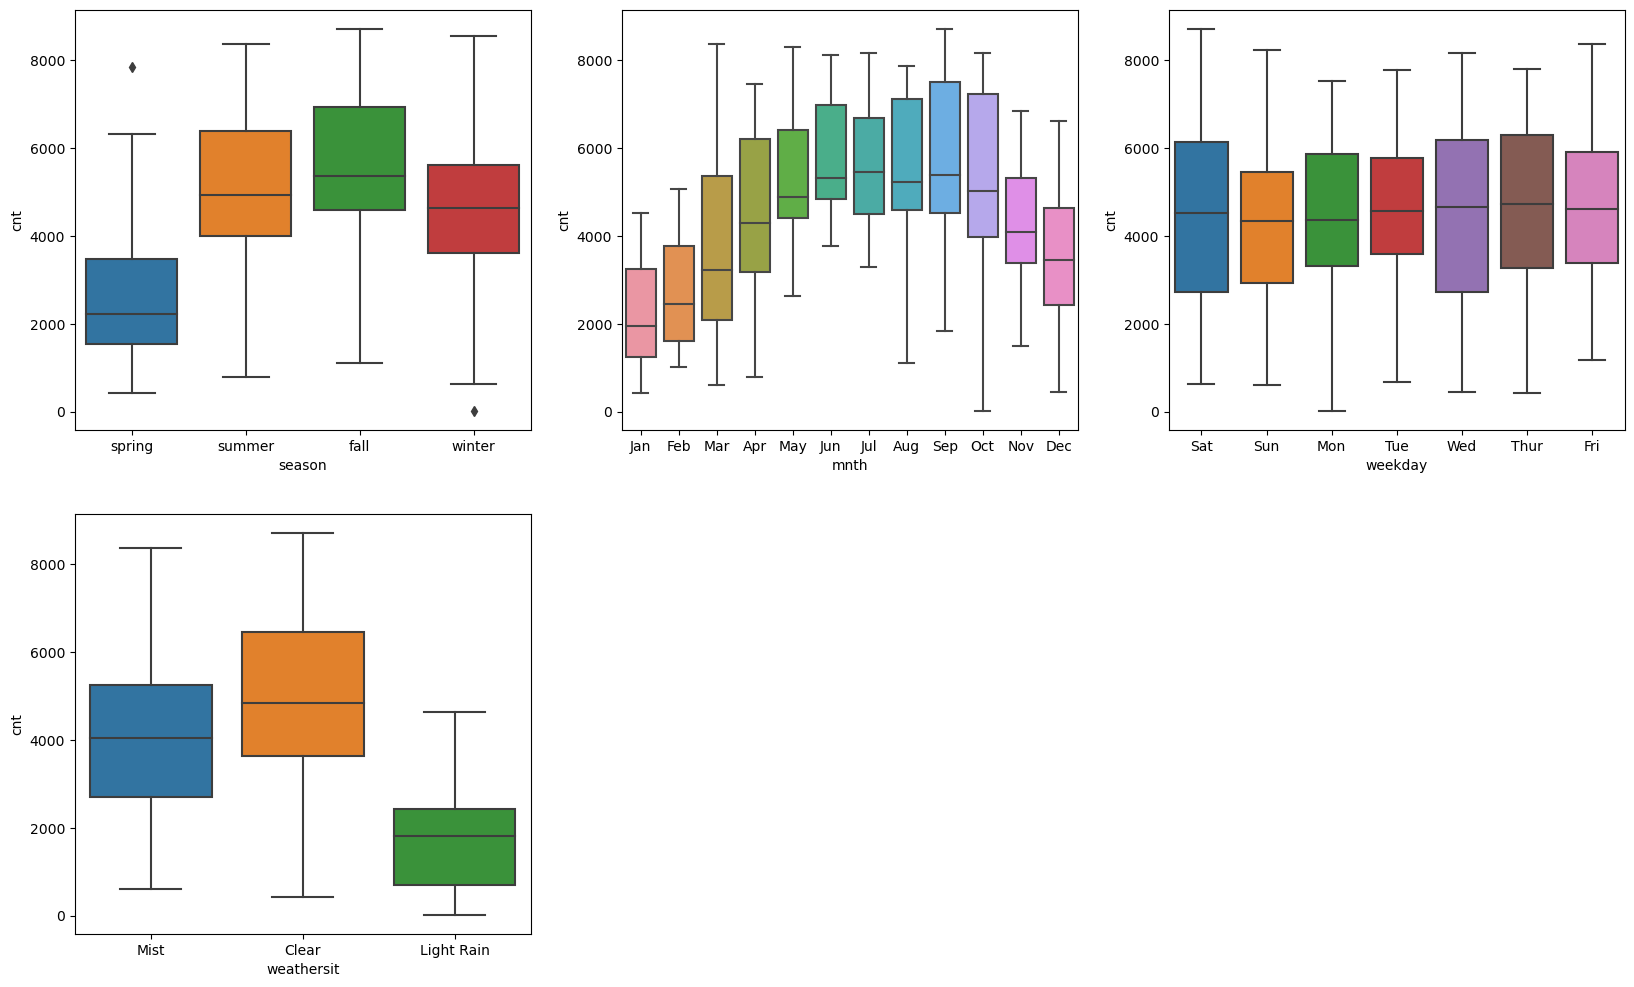

In [565]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = data)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = data)
plt.subplot(2,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = data)
plt.subplot(2,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = data)
plt.show()

## Validate the correlation 

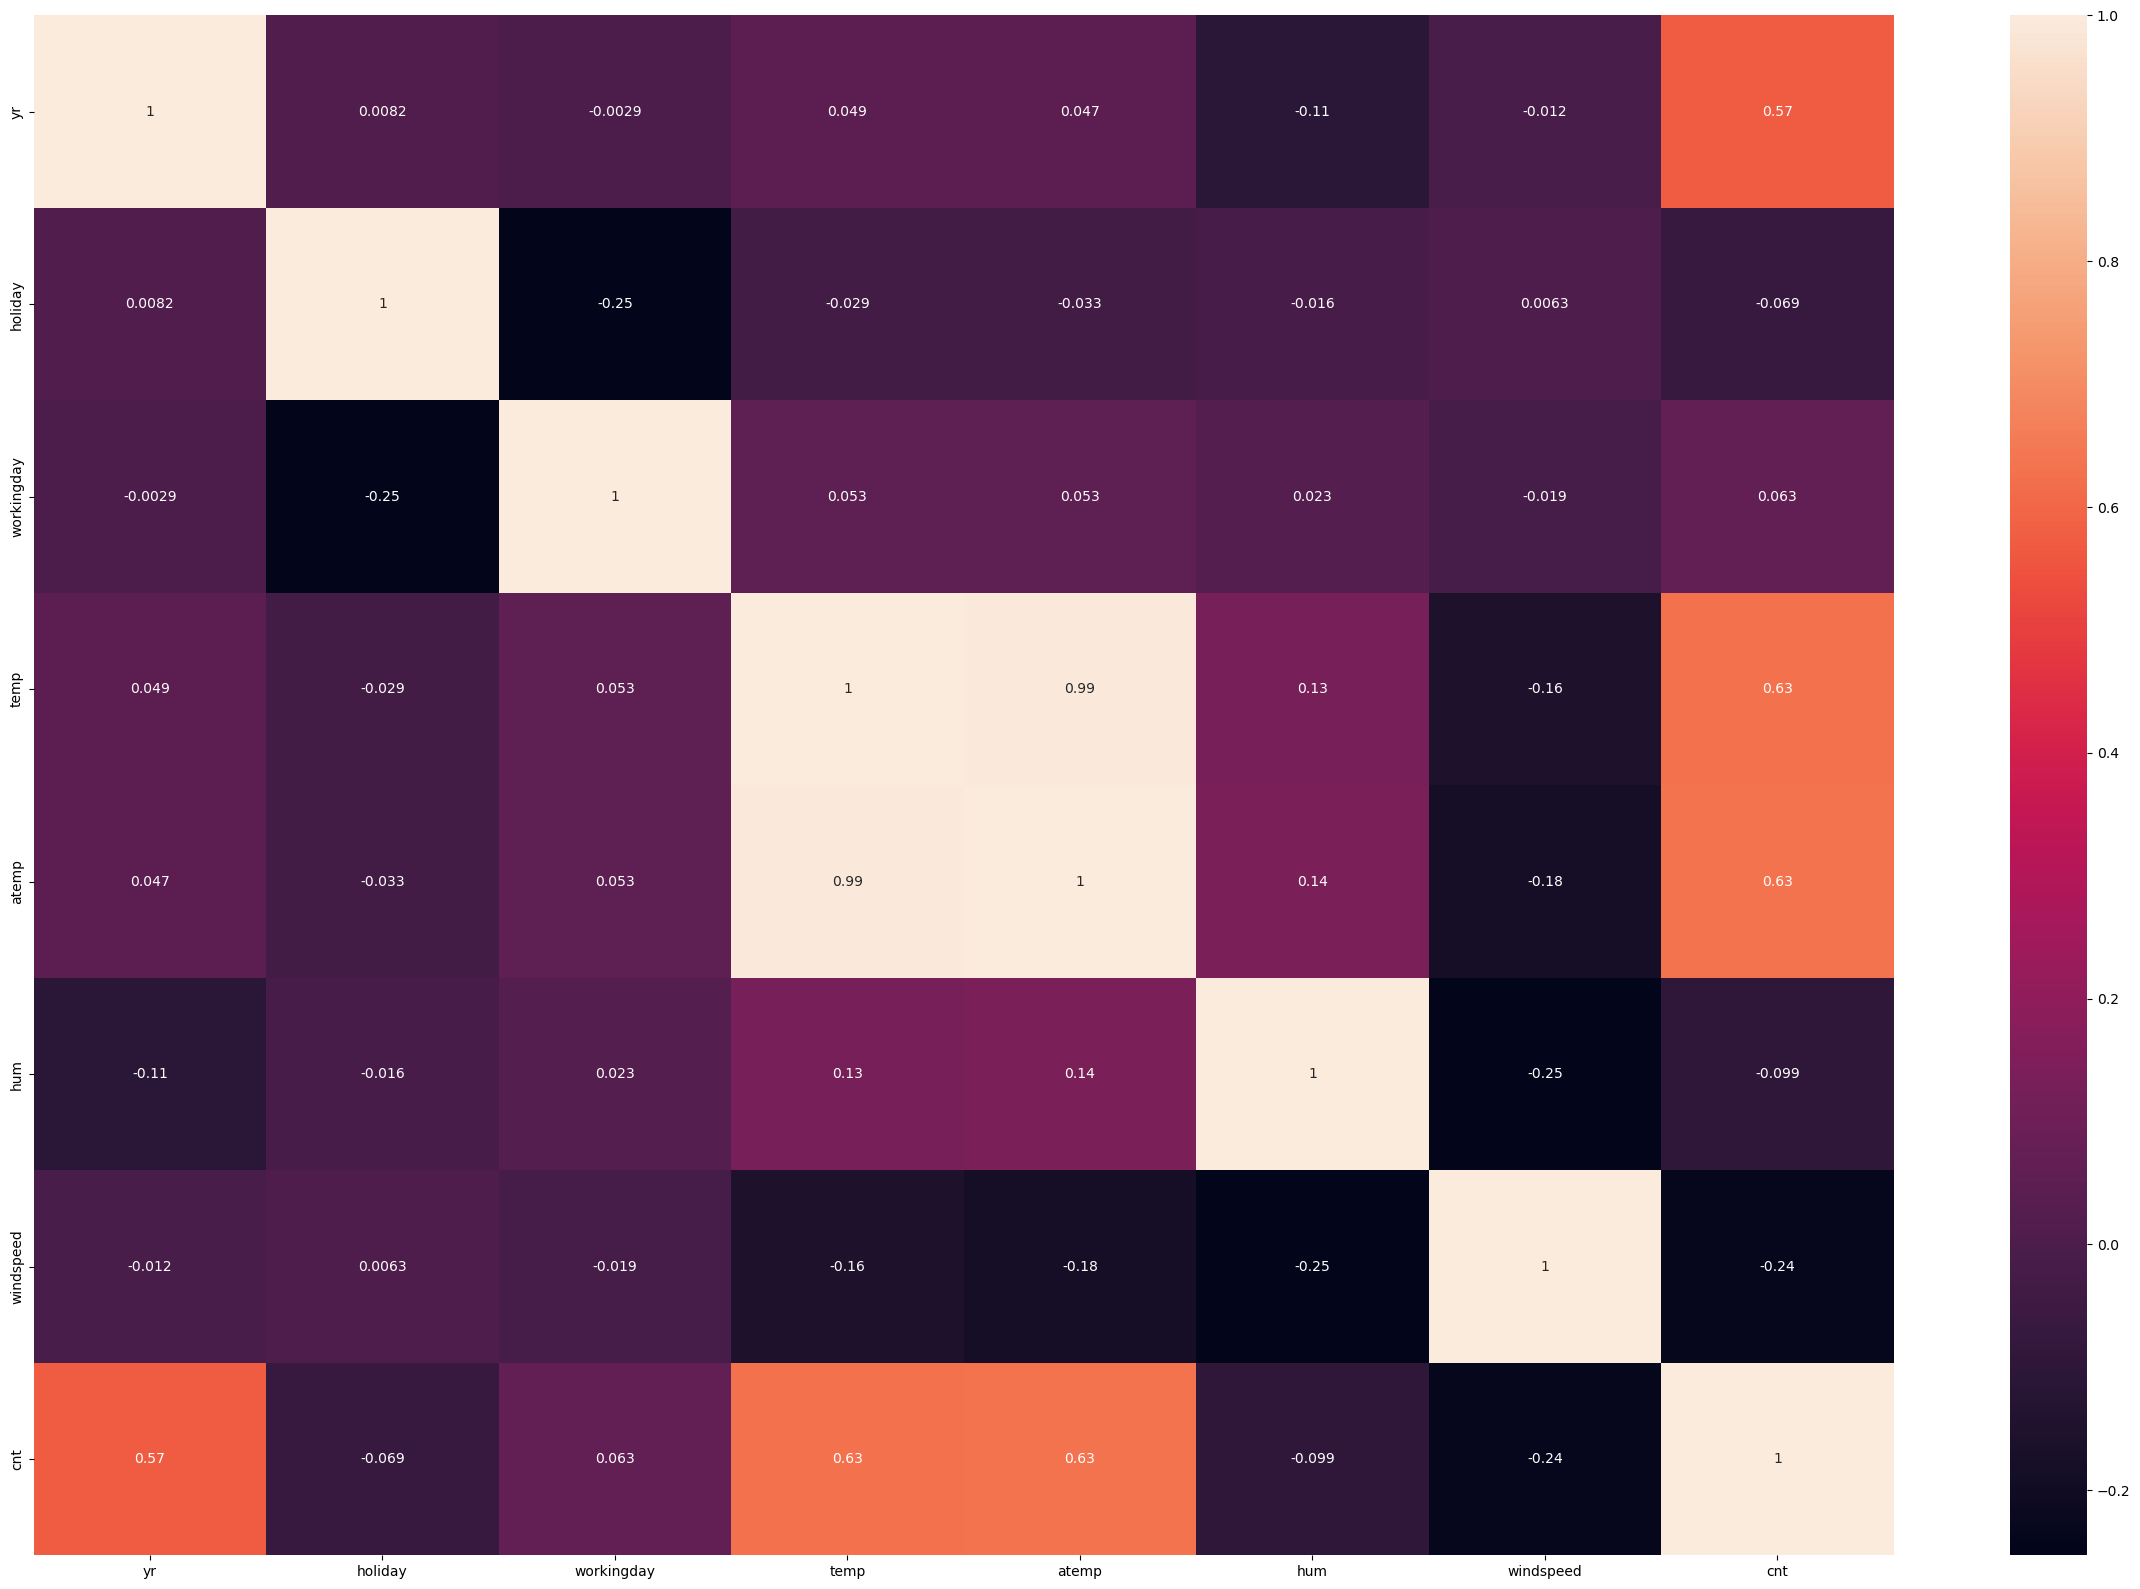

In [566]:
plt.figure(figsize = (30, 20))
sns.heatmap(data.corr(), annot = True)
plt.show()

   - temp is highly correlated with atemp which is 0.99

   - temp and a temp is moderately correlated with cnt having 0.63

# Step 4: Dummy variables 
 - Convert the categorical columns where n>2 to dummy variables


In [567]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,2018,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [568]:
# Columns season, month,weekday,weathersit has more than two levels and hence will be converted to dummy variables.

columns_dummy=['season','mnth','weekday','weathersit']
dummy=pd.get_dummies(data['season'],drop_first = True)

# Add the results to the original dataframe
data = pd.concat([data, dummy], axis = 1)

dummy=pd.get_dummies(data['mnth'],drop_first = True)
data = pd.concat([data, dummy], axis = 1)

dummy=pd.get_dummies(data['weekday'],drop_first = True)
data = pd.concat([data, dummy], axis = 1)

dummy=pd.get_dummies(data['weathersit'],drop_first = True)
data = pd.concat([data, dummy], axis = 1)


In [569]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,Light Rain,Mist
0,spring,2018,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,...,0,0,0,1,0,0,0,0,0,1
1,spring,2018,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,...,0,0,0,0,1,0,0,0,0,1
2,spring,2018,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,spring,2018,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,1,0,0,0
4,spring,2018,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [570]:
# Drop the original columns as we have the dummies present for them 

columns_dummy=['season','mnth','weekday','weathersit']
data.drop(columns_dummy,axis=1,inplace=True)

In [571]:
data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,Light Rain,Mist
0,2018,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,2018,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,2018,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,2018,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,2018,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


# Step 5: Split the data to Training and Test Set 

In [572]:
# Splitting the dataset to 70-30% ratio
np.random.seed(0)
data_train,data_test = train_test_split(data,train_size=0.70,test_size=0.30,random_state=100)

In [573]:
data_train.shape

(510, 30)

# Step 6: Scaling

In [574]:
data_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,Light Rain,Mist
653,2019,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,1,0,0,0,0,0,1,0,0,0
576,2019,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,1,0,0,0
426,2019,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,1,0,0,0,0,0,1
728,2019,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,0,0,1,0,0,0,0,0
482,2019,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,1,0,0,0,0,0,1


In [575]:
# Using Min Max scaling, import minmaxscaling from sklearn
scaler= MinMaxScaler()

#Apply scaler to all the numerical columns except dummy variable
num_vars=['temp','atemp','hum','windspeed']

data_train[num_vars]=scaler.fit_transform(data_train[num_vars])
data_train.head()


,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,Light Rain,Mist
653,2019,0,1,0.509887,0.501133,0.575354,0.300794,7534,0,0,...,1,0,0,0,0,0,1,0,0,0
576,2019,0,1,0.815169,0.766351,0.725633,0.264686,7216,0,0,...,0,0,0,0,0,0,1,0,0,0
426,2019,0,0,0.442393,0.438975,0.640189,0.255342,4066,1,0,...,0,0,0,1,0,0,0,0,0,1
728,2019,0,0,0.245101,0.200348,0.498067,0.663106,1796,1,0,...,0,0,0,0,1,0,0,0,0,0
482,2019,0,0,0.395666,0.391735,0.504508,0.188475,4220,0,1,...,0,0,0,1,0,0,0,0,0,1


## Validate the correlation after the scaling

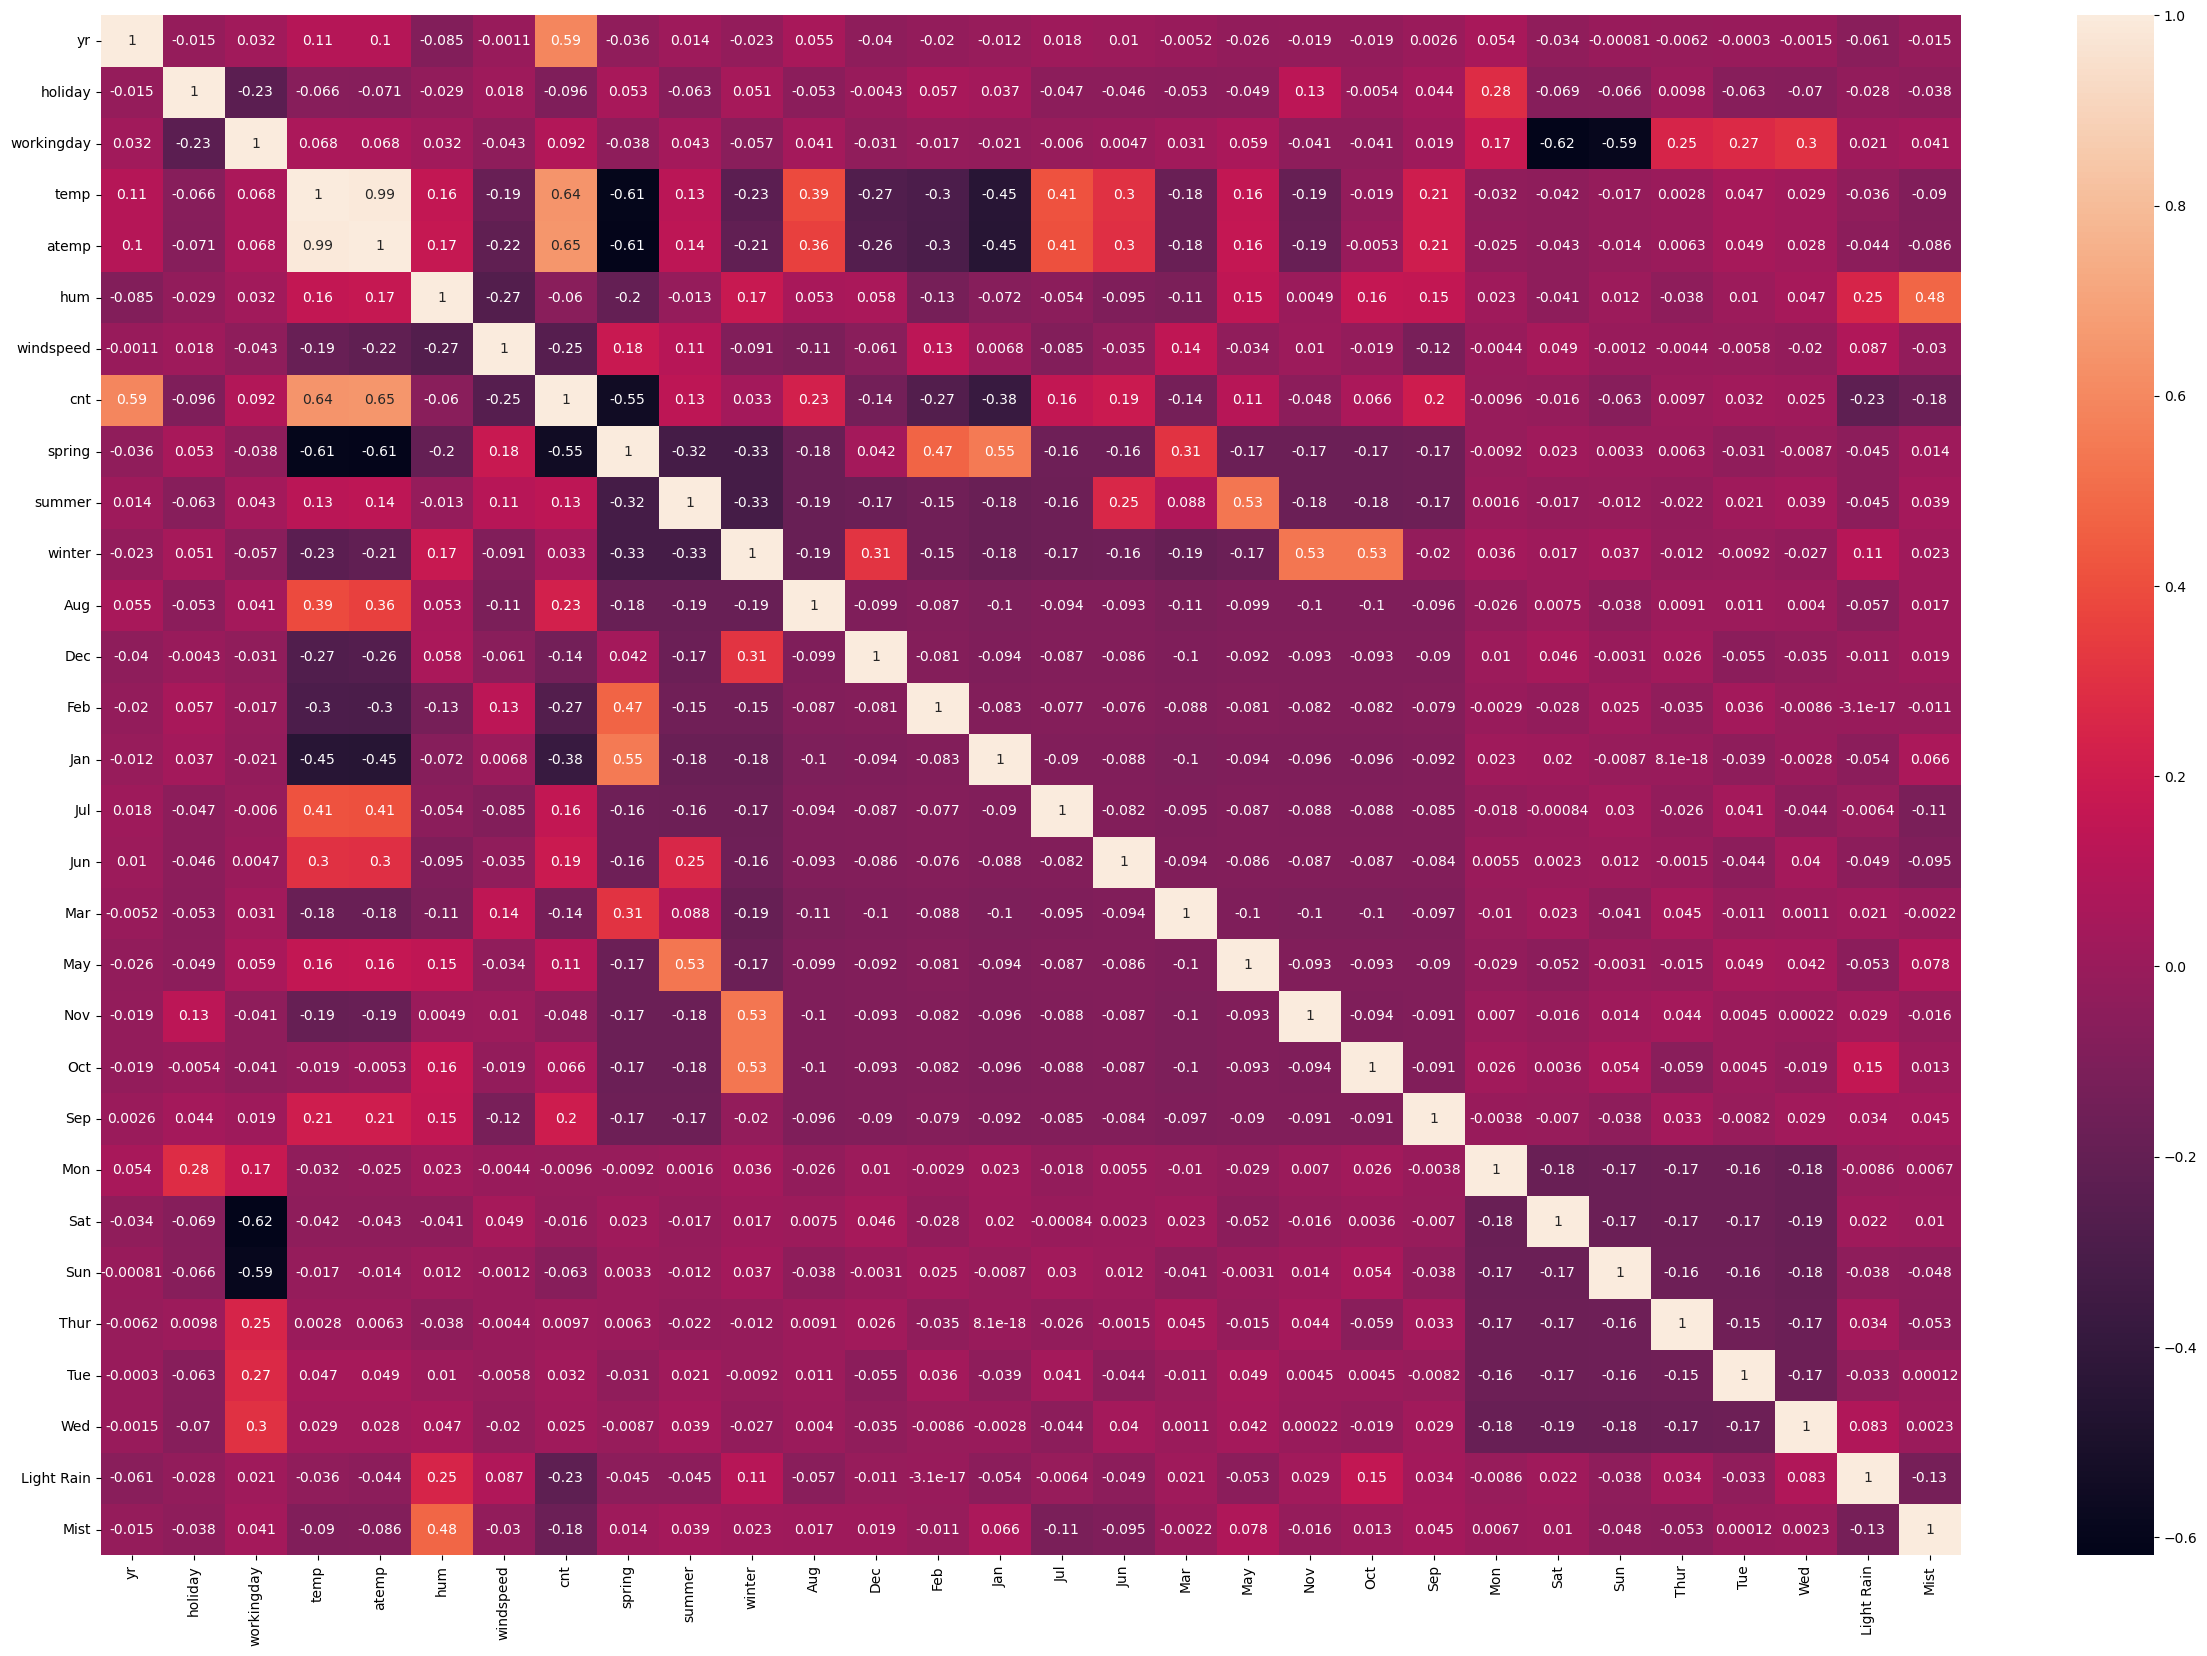

In [576]:
plt.figure(figsize = (30, 20))
sns.heatmap(data_train.corr(), annot = True)
plt.show()

- Inference 

   - temp is highly correlated with atemp which is 0.99

   - temp and a temp is moderately correlated with cnt having 0.65

   - humidity is negatively correlated with cnt

   - windspeed is negatively correlated with cnt
   
   - Strong negative correlation with spring season

# Step 7: Model Building 

In [577]:
# Split the Dependent and Independent variable
y_train=data_train.pop('cnt')
X_train=data_train

#### Feature Selecion : Using Hybrid approach (Automated (RFE) + Manual)

In [578]:
# Libarries used is RFE and Linear regression from sklearn 
# Running RFE 

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=10)
rfe= rfe.fit(X_train, y_train)

In [579]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 11),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 9),
 ('winter', False, 3),
 ('Aug', False, 13),
 ('Dec', False, 8),
 ('Feb', False, 10),
 ('Jan', False, 6),
 ('Jul', False, 2),
 ('Jun', False, 17),
 ('Mar', False, 18),
 ('May', False, 12),
 ('Nov', False, 7),
 ('Oct', False, 16),
 ('Sep', False, 4),
 ('Mon', False, 14),
 ('Sat', True, 1),
 ('Sun', True, 1),
 ('Thur', False, 20),
 ('Tue', False, 15),
 ('Wed', False, 19),
 ('Light Rain', True, 1),
 ('Mist', False, 5)]

In [580]:
# selected features 
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'Sat', 'Sun', 'Light Rain'],
      dtype='object')

In [581]:
# Not selected features
X_train.columns[~rfe.support_]

Index(['atemp', 'summer', 'winter', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun',
       'Mar', 'May', 'Nov', 'Oct', 'Sep', 'Mon', 'Thur', 'Tue', 'Wed', 'Mist'],
      dtype='object')

### Building model using statsmodel for detailed analysis

In [582]:
# Creating x_traing dataframe with the RFE selected variables
x_train_rfe=X_train[col]

x_train_rfe = sm.add_constant(x_train_rfe) # adding a constant as statsmodel does not add constatnt by itself

lm= sm.OLS(y_train , x_train_rfe).fit() # Running the linear model

lm.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.808
Method:                 Least Squares   F-statistic:                     238.4
Date:                Sun, 07 Jan 2024   Prob (F-statistic):          1.40e-174
Time:                        21:59:12   Log-Likelihood:                -4162.5
No. Observations:                 510   AIC:                             8345.
Df Residuals:                     500   BIC:                             8387.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.253e+06   1.24e+05    -26.233      0.000    -3.5e+06   -3.01e+06
yr          2017.0464     76.801     26.263      0.000    1866.154    2167.938
holiday    -8.138e+05    3.1e+04    -26.248      0.000   -8.75e+05   -7.53e+05
workingday -8.131e+05    3.1e+04    -26.224      0.000   -8.74e+05   -7.52e+05
temp        3386.9769    214.674     15.777      0.000    2965.202    3808.752
hum        -1876.3370    285.943     -6.562      0.000   -2438.135   -1314.539
windspeed  -1726.2266    238.152     -7.248      0.000   -2194.128   -1258.325
spring     -1353.1939    112.579    -12.020      0.000   -1574.380   -1132.007
Sat         -8.13e+05    3.1e+04    -26.224      0.000   -8.74e+05   -7.52e+05
Sun        -8.135e+05    3.1e+04    -26.235      0.000   -8.74e+05   -7.53e+05
Light Rain -1743.7907    235.857     -7.393      0.000   -2207.184   -1280.397
==============================================================================
Omnibus:                       48.233   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.896
Skew:                          -0.578   Prob(JB):                     1.83e-20
Kurtosis:                       4.714   Cond. No.                     4.44e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.06e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

- Inference 
    - Const is unusually highly negative and can be an overfitting issue
    - R-squared (0.811): approximately 81.1% of the variability in the dependent variable can be explained by the model. High value depicts the goodness of fit.
    - Adjusted R-squared (0.808): slightly lower than the R-squared
    - F-statistic (238.4): the F-statistic is large, showing that the model is statistically significant.
    - Prob (F-statistic) (< 0.0001): It's extremely low, suggesting the model is statistically significant.
    - yr, workingday,holiay, sat and sunday : these coefficients are very large and negative and could be a multicollinearity issue.

In [583]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = x_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,holiday,inf
3,workingday,inf
8,Sat,inf
9,Sun,inf
4,temp,1.63
7,spring,1.62
5,hum,1.21
6,windspeed,1.14
10,Light Rain,1.10
1,yr,1.03


   - holiday, workingday, sat, sun has infinite VIF showing multicollinearity 
   - others have low vif than 10 depicting that they do not have severe collinearity

In [584]:
# dropping the variables holiday, sat and sun as it has high VIF and is insignifinact to the model

columns_to_drop=['holiday','Sat','Sun']
X_train_new = x_train_rfe.drop(columns_to_drop, axis = 1)

# Running the statsmodel again 
x_train_lm = sm.add_constant(X_train_new) # adding a constant as statsmodel does not add constatnt by itself

lm= sm.OLS(y_train , X_train_new).fit() # Running the linear model

lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.803
Method:                 Least Squares   F-statistic:                     297.3
Date:                Sun, 07 Jan 2024   Prob (F-statistic):          4.95e-174
Time:                        21:59:12   Log-Likelihood:                -4169.6
No. Observations:                 510   AIC:                             8355.
Df Residuals:                     502   BIC:                             8389.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.058e+06   1.57e+05    -25.874      0.000   -4.37e+06   -3.75e+06
yr          2012.9556     77.707     25.904      0.000    1860.284    2165.627
workingday   163.1899     82.323      1.982      0.048       1.449     324.931
temp        3401.6673    217.153     15.665      0.000    2975.027    3828.308
hum        -1904.9201    289.162     -6.588      0.000   -2473.038   -1336.802
windspeed  -1713.4705    240.990     -7.110      0.000   -2186.945   -1239.997
spring     -1356.7191    113.922    -11.909      0.000   -1580.541   -1132.897
Light Rain -1700.6245    238.405     -7.133      0.000   -2169.019   -1232.230
==============================================================================
Omnibus:                       44.704   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               96.932
Skew:                          -0.494   Prob(JB):                     8.94e-22
Kurtosis:                       4.894   Cond. No.                     8.25e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.25e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Inference
- yr: The coefficient for 'yr' is positive, suggesting an increase in 'cnt' over the years.
- workingday: The 'workingday' variable has a small positive effect on 'cnt'.
- temp: The 'temp' variable has a strong positive effect, indicating that higher temperatures are associated with higher 'cnt'.
- hum: The 'hum' variable has a negative effect on 'cnt', suggesting higher humidity levels correlate with lower 'cnt'.
- windspeed: Higher wind speeds are associated with lower 'cnt', as indicated by the negative coefficient.
- spring: Being in the spring season is associated with a lower 'cnt', as indicated by the negative coefficient.
- Light Rain: The presence of light rain is associated with a significant decrease in 'cnt'.

In [585]:
# Running VIF again 
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,16707183.22
3,temp,1.63
6,spring,1.62
4,hum,1.21
5,windspeed,1.13
7,Light Rain,1.10
1,yr,1.02
2,workingday,1.01


In [586]:
# Making predictions
y_train_pred = lm.predict(X_train_new)


# Step 8: Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

Text(0.5, 0, 'Errors')

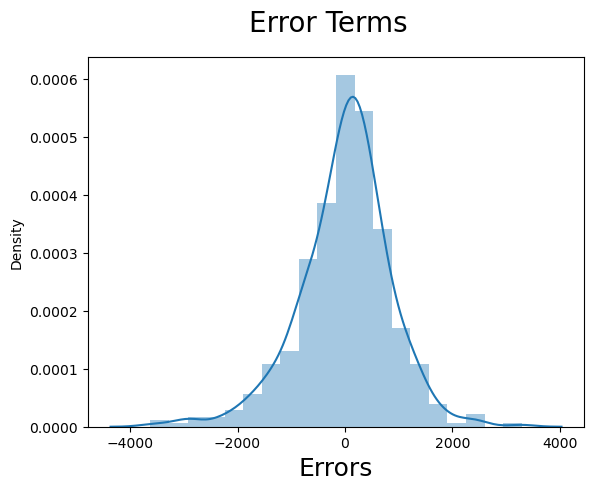

In [587]:
y_train_cnt = lm.predict(x_train_lm)

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label


### Inference
 - Error terms are normally distributed across 0

# Step 9: Making Predictions on test data

### Applying the scale on test set

In [588]:
#Apply scaler to all the numerical columns except dummy variable
num_vars=['temp','atemp','hum','windspeed']

data_test[num_vars]=scaler.transform(data_test[num_vars])
data_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thur,Tue,Wed,Light Rain,Mist
184,2018,1,0,0.831783,0.769660,0.657364,0.084219,6043,0,0,...,0,0,1,0,0,0,0,0,0,1
535,2019,0,1,0.901354,0.842587,0.610133,0.153728,6211,0,1,...,0,0,0,0,0,0,0,1,0,0
299,2018,0,1,0.511964,0.496145,0.837699,0.334206,2659,0,0,...,1,0,0,0,0,1,0,0,0,1
221,2018,0,1,0.881625,0.795343,0.437098,0.339570,4780,0,0,...,0,0,0,0,0,0,0,1,0,0
152,2018,0,1,0.817246,0.741471,0.314298,0.537414,4968,0,1,...,0,0,0,0,0,1,0,0,0,0


#### Dividing into X_test and y_test

In [589]:
y_test = data_test.pop('cnt')
X_test = data_test

In [590]:
X_train_new.columns

Index(['const', 'yr', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'Light Rain'],
      dtype='object')

In [591]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
columns=['yr', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'Light Rain']
X_test_new = X_test[columns]



In [592]:
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

# Making predictions
y_test_pred = lm.predict(X_test_new)

# Step 10: Model Evalutaion 

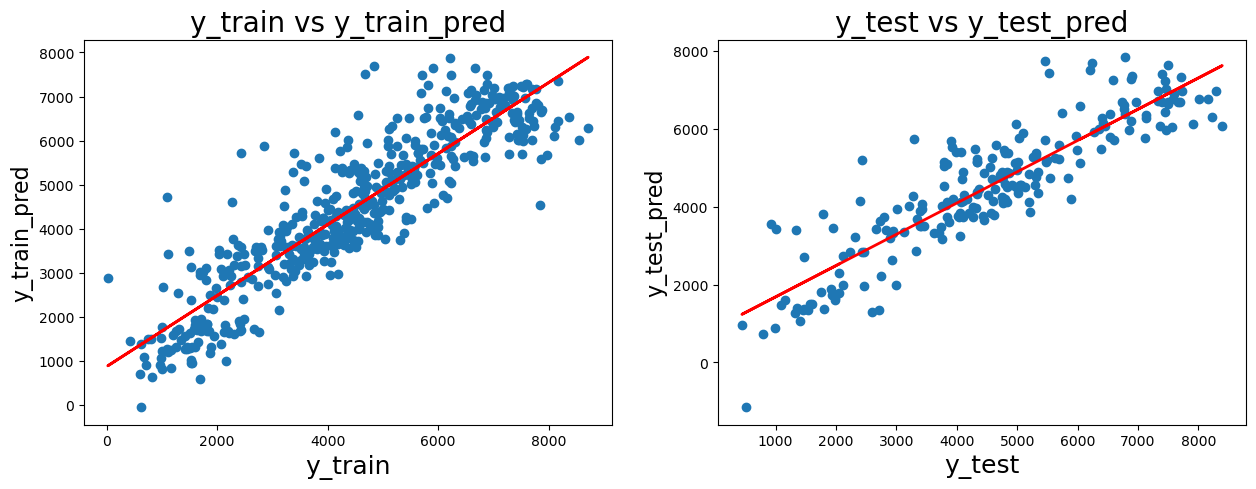

In [593]:

# Assuming you have y_train, y_train_pred, y_test, and y_test_pred defined

# Calculate regression line parameters for y_train vs. y_train_pred
slope_train, intercept_train = np.polyfit(y_train, y_train_pred, 1)

# Calculate regression line parameters for y_test vs. y_test_pred
slope_test, intercept_test = np.polyfit(y_test, y_test_pred, 1)

# Create scatter plots
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Scatter plot for y_train vs. y_train_pred with regression line
axs[0].scatter(y_train, y_train_pred)
axs[0].plot(y_train, slope_train * y_train + intercept_train, color='red', linewidth=2)
axs[0].set_title('y_train vs y_train_pred', fontsize=20)
axs[0].set_xlabel('y_train', fontsize=18)
axs[0].set_ylabel('y_train_pred', fontsize=16)

# Scatter plot for y_test vs. y_test_pred with regression line
axs[1].scatter(y_test, y_test_pred)
axs[1].plot(y_test, slope_test * y_test + intercept_test, color='red', linewidth=2)
axs[1].set_title('y_test vs y_test_pred', fontsize=20)
axs[1].set_xlabel('y_test', fontsize=18)
axs[1].set_ylabel('y_test_pred', fontsize=16)

plt.show()


### R2 Score of Training and test set

In [594]:
# evaluate the model -- Compare the R2 value

train_r2=r2_score(y_true=y_train, y_pred=y_train_pred)
test_r2= r2_score(y_true=y_test, y_pred=y_test_pred)

print("R2 score of Training set: ", round(train_r2*100,2),"%")

print("R2 score of test test set: " , round(test_r2*100,2),"%")


R2 score of Training set:  80.56 %
R2 score of test test set:  79.73 %


### R2 score is nearly same on training and test set